# Calculate Genre Of Songs By Modelling

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn import datasets, svm, tree, preprocessing, metrics

### Import dataset

In [35]:
data = pd.read_csv("../../data/cleanedDataSetWithGenres.csv")

### Explore the dataset

In [36]:
data.head()

,Unnamed: 0,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,253019.0,0.852,0.773,8.0,-2.921,0.0776,0.187,0.000030,0.1590,0.9070,102.034,195840.0,Pop
1,1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0,Pop
2,2,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0,Pop
3,3,7 rings,1,2019-03-16,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,Indonesia,125837.0,0.778,0.317,1.0,-10.732,0.3340,0.592,0.000000,0.0881,0.3270,140.048,178627.0,Rap
4,4,Shape of You,1,2017-03-08,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Portugal,55132.0,0.825,0.652,1.0,-3.183,0.0802,0.581,0.000000,0.0931,0.9310,95.977,233713.0,R&B


In [37]:
data.dtypes

Unnamed: 0            int64
title                object
rank                  int64
date                 object
artist               object
url                  object
region               object
streams             float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
genre                object
dtype: object

In [38]:
# Drop unnamed column with old index.
data.drop('Unnamed: 0', inplace=True, axis=1)

In [40]:
# Show distribution of genres.
data['genre'].value_counts()

Rap          4962
Pop          3386
R&B           486
Rock          271
Country        55
Non-Music      16
Name: genre, dtype: int64

<AxesSubplot:>

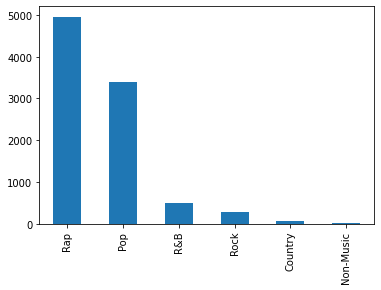

In [41]:
data['genre'].value_counts().plot.bar()

In [44]:
# Show average values of different genres
data.groupby('genre').mean()

,rank,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
genre,,,,,,,,,,,,,
Country,6.509091,558525.690909,0.616455,0.624291,3.927273,-6.165818,0.047007,0.338672,0.000227,0.182062,0.528036,118.997909,214030.400000
Non-Music,8.500000,52651.062500,0.675687,0.590194,4.375000,-7.691250,0.166212,0.348913,0.013736,0.272744,0.440500,125.413875,198262.687500
Pop,5.973420,172066.515357,0.665383,0.644842,5.346722,-6.309671,0.088835,0.267259,0.011250,0.172104,0.527481,121.590847,208395.932369
R&B,6.199588,279928.462963,0.667167,0.581612,5.014403,-7.084679,0.119731,0.304387,0.010394,0.159428,0.460988,119.223866,208715.207819
Rap,6.344015,229397.210601,0.743791,0.646882,5.318622,-6.951250,0.200828,0.235030,0.006020,0.166448,0.498846,122.288106,191702.317211
Rock,7.088561,184411.929889,0.564605,0.696542,5.346863,-6.148196,0.065221,0.150808,0.027115,0.191839,0.468004,124.315421,234032.896679


In [45]:
data.corr()

,rank,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
rank,1.000000,-0.071733,-0.039571,-0.008240,-0.003710,-0.041149,0.026157,0.023173,0.026211,0.019740,-0.021164,-0.013829,-0.034387
streams,-0.071733,1.000000,0.013244,-0.054185,-0.006170,0.008528,0.049612,-0.008479,-0.007509,0.010141,-0.070182,0.003257,-0.034188
danceability,-0.039571,0.013244,1.000000,0.098647,0.007529,0.077020,0.150154,-0.202518,-0.027530,-0.084828,0.334702,-0.074984,-0.217149
energy,-0.008240,-0.054185,0.098647,1.000000,0.029266,0.690027,0.009008,-0.436093,-0.035510,0.124784,0.356057,0.057210,-0.050643
key,-0.003710,-0.006170,0.007529,0.029266,1.000000,-0.006678,0.029575,0.012737,0.003692,-0.001379,0.045157,0.007823,-0.019867
loudness,-0.041149,0.008528,0.077020,0.690027,-0.006678,1.000000,-0.128264,-0.334114,-0.112977,0.056855,0.259502,0.037314,-0.052682
speechiness,0.026157,0.049612,0.150154,0.009008,0.029575,-0.128264,1.000000,-0.017547,-0.067156,0.039975,0.045120,0.047505,-0.132727
acousticness,0.023173,-0.008479,-0.202518,-0.436093,0.012737,-0.334114,-0.017547,1.000000,0.003596,-0.051975,-0.104248,-0.057033,0.067066
instrumentalness,0.026211,-0.007509,-0.027530,-0.035510,0.003692,-0.112977,-0.067156,0.003596,1.000000,-0.021590,-0.058337,-0.008918,0.041880
liveness,0.019740,0.010141,-0.084828,0.124784,-0.001379,0.056855,0.039975,-0.051975,-0.021590,1.000000,0.046480,-0.001990,-0.000962


In [54]:
grouped = data.groupby(['genre'])
grouped.boxplot(rot=45, fontsize=12, figsize=(8,10)) 

AttributeError: 'SeriesGroupBy' object has no attribute 'boxplot'